In [1]:
from helper_functions import unzip_data

In [2]:
# unzip_data("nlp-getting-started.zip")

In [3]:
import pandas as pd

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [5]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [8]:
print(len(train_df))
print(len(test_df))

7613
3263


In [9]:
import numpy as np
def get_random_sample():
    n = np.random.randint(len(train_df)-1)
    row = train_df.iloc[n:n+1,:].itertuples()
    for x in row:
        print('Target :',x.target)
        print('Text :',x.text)

In [10]:
get_random_sample()

Target : 0
Text : that exploded &amp; brought about the
beginning of universe matches what's
mentioned in the versethe heaven and Earth
(thus the universe)


In [11]:
X = train_df['text'].to_numpy()
y = train_df['target'].to_numpy()

In [12]:
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_targets, val_targets = train_test_split(X,y,test_size=0.1,random_state=42)

In [13]:
len(train_sentences),len(val_sentences)


(6851, 762)

In [14]:
train_sentences[:5]

array(["'McFadden Reportedly to Test Hamstring Thursday' via @TeamStream http://t.co/jWq4KvJH2j",
       'w--=-=-=-[ NEMA warns Nigerians to prepare for drought http://t.co/5uoOPhSqU3',
       "When I was cooking earlier I got electrocuted some crucial ?????? now I'm psychic lol",
       "I'm On Fire.  http://t.co/WATsmxYTVa",
       "More than 40 families affected by the fatal outbreak of Legionnaires' disease in Edinburgh are to sue two comp... http://t.co/vsoXioOy78"],
      dtype=object)

In [15]:
train_targets[:5]

array([0, 1, 0, 0, 1])

In [16]:
max_vocab_len = 10000
max_len = round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

In [17]:
from tensorflow.keras.layers import TextVectorization
text_vectorizer = TextVectorization(max_tokens = max_vocab_len,
                                    output_mode = 'int',
                                    output_sequence_length = max_len)

In [18]:
text_vectorizer.adapt(train_sentences)

2024-01-25 20:46:21.877240: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [19]:
text_vectorizer(['Typhoon Soudelor approaches'])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 476,  759, 2183,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [20]:
top_5 = text_vectorizer.get_vocabulary()[:5]
bottom_5 = text_vectorizer.get_vocabulary()[-5:]
print("top 5:",top_5)
print("Bottom 5:",bottom_5)

top 5: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5: ['pakthey', 'pakistan\x89Ûªs', 'pakistans', 'pajamas', 'paints']


In [21]:
from tensorflow.keras.layers import Embedding

In [22]:
embeddings = Embedding(input_dim=max_vocab_len,
                       output_dim = 128,
                       embeddings_initializer = 'uniform',
                       input_length = max_len,
                       name = 'embedding_1')

In [23]:
import random

In [24]:
random_sentence = random.choice(train_sentences)
tok = text_vectorizer([random_sentence])
embeddings(tok)

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 1.0960974e-02,  1.2876201e-02,  2.5147285e-02, ...,
         -4.3889154e-02, -7.5126775e-03, -3.5486721e-02],
        [-4.3975066e-02, -2.2009075e-02, -5.0729625e-03, ...,
         -4.9662746e-02, -2.7155017e-02,  9.8718517e-03],
        [-2.3431873e-02,  6.7074299e-03,  2.4393622e-02, ...,
          4.8846696e-02,  2.2456050e-03,  4.2378727e-02],
        ...,
        [ 1.5087612e-03,  8.2932413e-05,  2.1836162e-03, ...,
         -1.8462051e-02, -2.0860290e-02,  3.9239358e-02],
        [ 1.5087612e-03,  8.2932413e-05,  2.1836162e-03, ...,
         -1.8462051e-02, -2.0860290e-02,  3.9239358e-02],
        [ 1.5087612e-03,  8.2932413e-05,  2.1836162e-03, ...,
         -1.8462051e-02, -2.0860290e-02,  3.9239358e-02]]], dtype=float32)>

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_targets)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [26]:
baseline_score = model_0.score(val_sentences,val_targets)
baseline_score

0.7782152230971129

In [27]:
pred_targets = model_0.predict(val_sentences)
pred_targets[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

BaseLine Model (Naive Bias)

In [28]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [29]:
baseline_results = calculate_results(val_targets,pred_targets)

Model-1 (Simple Dense)

In [30]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [31]:
import tensorflow as tf
from tensorflow.keras import layers

In [32]:
inputs = layers.Input(shape=(1,),dtype='string')
x = text_vectorizer(inputs)
x = embeddings(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)


model_1 = tf.keras.Model(inputs,outputs,name='model_1')

In [33]:
model_1.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [34]:
model_1_history = model_1.fit(train_sentences,
            train_targets,
            epochs=10,
            validation_data=(val_sentences,val_targets),
            callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240125-204623
Epoch 1/10
215/215 [==============================] - 2s 6ms/step - loss: 0.6125 - accuracy: 0.6847 - val_loss: 0.5415 - val_accuracy: 0.7703
Epoch 2/10
215/215 [==============================] - 1s 5ms/step - loss: 0.4405 - accuracy: 0.8180 - val_loss: 0.4842 - val_accuracy: 0.7927
Epoch 3/10
215/215 [==============================] - 1s 5ms/step - loss: 0.3447 - accuracy: 0.8610 - val_loss: 0.4810 - val_accuracy: 0.7861
Epoch 4/10
215/215 [==============================] - 1s 5ms/step - loss: 0.2829 - accuracy: 0.8913 - val_loss: 0.4856 - val_accuracy: 0.7874
Epoch 5/10
215/215 [==============================] - 1s 5ms/step - loss: 0.2343 - accuracy: 0.9146 - val_loss: 0.5034 - val_accuracy: 0.7808
Epoch 6/10
215/215 [==============================] - 1s 5ms/step - loss: 0.1988 - accuracy: 0.9283 - val_loss: 0.5285 - val_accuracy: 0.7756
Epoch 7/10
215/215 [==============================] - 2s 8ms/step - l

In [35]:
model_1.evaluate(val_sentences,val_targets)

24/24 [==============================] - 0s 796us/step - loss: 0.6554 - accuracy: 0.7598


[0.6553800702095032, 0.7598425149917603]

In [36]:
pred_targets = model_1.predict(val_sentences)

24/24 [==============================] - 0s 728us/step


In [37]:
pred_targets[:5]

array([[0.00766716],
       [0.10855565],
       [0.09960067],
       [0.00154656],
       [0.73293215]], dtype=float32)

In [38]:
model_1_preds = tf.squeeze(tf.round(pred_targets))
model_1_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 0., 1.], dtype=float32)>

In [39]:
model_1_results = calculate_results(val_targets,model_1_preds)

In [40]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results, 
                                new_model_results=model_1_results)

Baseline accuracy: 77.82, New accuracy: 75.98, Difference: -1.84
Baseline precision: 0.79, New precision: 0.76, Difference: -0.03
Baseline recall: 0.78, New recall: 0.76, Difference: -0.02
Baseline f1: 0.77, New f1: 0.76, Difference: -0.01


In [41]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_len,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_len,
                                     name="embedding_2")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [42]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [43]:
model_2.summary()


Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [44]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_targets,
                              epochs=5,
                              validation_data=(val_sentences, val_targets),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20240125-204638


Epoch 1/5
215/215 [==============================] - 4s 15ms/step - loss: 0.5153 - accuracy: 0.7432 - val_loss: 0.4659 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3159 - accuracy: 0.8718 - val_loss: 0.5317 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.2186 - accuracy: 0.9194 - val_loss: 0.5282 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1484 - accuracy: 0.9444 - val_loss: 0.7042 - val_accuracy: 0.7559
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.1076 - accuracy: 0.9600 - val_loss: 0.9149 - val_accuracy: 0.7572


In [45]:
model_2.evaluate(val_sentences,val_targets)

24/24 [==============================] - 0s 3ms/step - loss: 0.9149 - accuracy: 0.7572


[0.9149055480957031, 0.7572178244590759]

In [46]:
model_2_preds = model_2.predict(val_sentences)

24/24 [==============================] - 0s 2ms/step


In [47]:
model_2_preds[:10]

array([[0.0027464 ],
       [0.23027453],
       [0.00524693],
       [0.0032164 ],
       [0.996755  ],
       [0.06060776],
       [0.00124677],
       [0.0211354 ],
       [0.00998242],
       [0.9986603 ]], dtype=float32)

In [48]:
model_2_preds = tf.squeeze(tf.round(model_2_preds))

In [49]:
model_2_results = calculate_results(val_targets,model_2_preds)

In [50]:
model_2_results

{'accuracy': 75.7217847769029,
 'precision': 0.7568414957109175,
 'recall': 0.7572178477690289,
 'f1': 0.7551969389653065}

In [51]:
compare_baseline_to_new_results(baseline_results=baseline_results, 
                                new_model_results=model_2_results)

Baseline accuracy: 77.82, New accuracy: 75.72, Difference: -2.10
Baseline precision: 0.79, New precision: 0.76, Difference: -0.04
Baseline recall: 0.78, New recall: 0.76, Difference: -0.02
Baseline f1: 0.77, New f1: 0.76, Difference: -0.02


In [66]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [77]:
model_3_embeddings = Embedding(input_dim = max_vocab_len,
                               output_dim = 128,
                               embeddings_initializer = 'normal',
                               input_length = max_len,
                               name = 'embedings_3')

In [78]:
inputs = layers.Input(shape=(1,),dtype='string')
x = text_vectorizer(inputs)
x = model_3_embeddings(x)
x = layers.GRU(64,return_sequences = True)(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1,activation='sigmoid')(x)

model_3 = tf.keras.Model(inputs,outputs)

In [79]:
model_3.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [80]:
model_3.fit(train_sentences,
            train_targets,
            epochs = 5,
            validation_data = (val_sentences,val_targets),
            callbacks=[model_checkpoint_callback])

Epoch 1/5
215/215 [==============================] - 6s 19ms/step - loss: 0.5341 - accuracy: 0.7260 - val_loss: 0.4693 - val_accuracy: 0.7992
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3255 - accuracy: 0.8672 - val_loss: 0.5206 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.2217 - accuracy: 0.9169 - val_loss: 0.5182 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.1526 - accuracy: 0.9469 - val_loss: 0.6688 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.1166 - accuracy: 0.9615 - val_loss: 0.7798 - val_accuracy: 0.7664


In [82]:
model_3.evaluate(val_sentences,val_targets)

24/24 [==============================] - 0s 3ms/step - loss: 0.7798 - accuracy: 0.7664


[0.7798168063163757, 0.7664042115211487]

In [83]:
model_3_preds = model_3.predict(val_sentences)

24/24 [==============================] - 0s 3ms/step


In [84]:
model_3_preds = tf.squeeze(tf.round(model_3_preds))

In [86]:
model_3_results = calculate_results(val_targets,model_3_preds)
model_3_results

{'accuracy': 76.64041994750657,
 'precision': 0.7699172766005876,
 'recall': 0.7664041994750657,
 'f1': 0.7620808707395365}

In [87]:
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 77.82, New accuracy: 76.64, Difference: -1.18
Baseline precision: 0.79, New precision: 0.77, Difference: -0.02
Baseline recall: 0.78, New recall: 0.77, Difference: -0.01
Baseline f1: 0.77, New f1: 0.76, Difference: -0.01


In [114]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [115]:
model_4_embeddings = Embedding(input_dim = max_vocab_len,
                               output_dim = 128,
                               embeddings_initializer = 'normal',
                               input_length = max_len,
                               name = 'model_4_embeddings')

In [116]:
inputs = layers.Input(shape = (1,),dtype = 'string')
x = text_vectorizer(inputs)
x = model_4_embeddings(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
 
model_4 = tf.keras.Model(inputs,outputs)

In [117]:
model_4.compile(loss ='binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [118]:
model_4.fit(train_sentences,
            train_targets,
            epochs = 5,
            validation_data = (val_sentences,val_targets),
            callbacks = [model_checkpoint_callback])

Epoch 1/5
215/215 [==============================] - 5s 15ms/step - loss: 0.5168 - accuracy: 0.7463 - val_loss: 0.4674 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3201 - accuracy: 0.8676 - val_loss: 0.4811 - val_accuracy: 0.7966
Epoch 3/5
215/215 [==============================] - 4s 20ms/step - loss: 0.2184 - accuracy: 0.9168 - val_loss: 0.5467 - val_accuracy: 0.7953
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.1438 - accuracy: 0.9489 - val_loss: 0.7593 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0992 - accuracy: 0.9631 - val_loss: 0.8775 - val_accuracy: 0.7664


In [119]:
x = model_4.load_weights(checkpoint_filepath)
x

In [120]:
model_4

In [121]:
model_4.evaluate(val_sentences,val_targets)

24/24 [==============================] - 0s 3ms/step - loss: 0.4674 - accuracy: 0.7979


[0.46741294860839844, 0.7979002594947815]

In [122]:
model_4_preds = model_4.predict(val_sentences)

24/24 [==============================] - 0s 3ms/step


In [123]:
model_4_preds = tf.squeeze(tf.round(model_4_preds))

In [125]:
# Calculate bidirectional RNN model results
model_4_results = calculate_results(val_targets, model_4_preds)
model_4_results

{'accuracy': 79.79002624671917,
 'precision': 0.8112297050595747,
 'recall': 0.7979002624671916,
 'f1': 0.7917197430245241}

In [127]:
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 77.82, New accuracy: 79.79, Difference: 1.97
Baseline precision: 0.79, New precision: 0.81, Difference: 0.02
Baseline recall: 0.78, New recall: 0.80, Difference: 0.02
Baseline f1: 0.77, New f1: 0.79, Difference: 0.02


In [129]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_len,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_len,
                                     name="embedding_5")

In [132]:
inputs = layers.Input(shape=(1,),dtype = 'string')
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters = 32, kernel_size = 5, activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)

model_5 = tf.keras.Model(inputs,outputs)

In [133]:
# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_5.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_14 (Dense)            (None, 1)                 33 

In [135]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_targets,
                              epochs=5,
                              validation_data=(val_sentences, val_targets),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20240125-212937
Epoch 1/5
215/215 [==============================] - 2s 9ms/step - loss: 0.5672 - accuracy: 0.7087 - val_loss: 0.4801 - val_accuracy: 0.7953
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3400 - accuracy: 0.8589 - val_loss: 0.4928 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2094 - accuracy: 0.9237 - val_loss: 0.5901 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1331 - accuracy: 0.9548 - val_loss: 0.6833 - val_accuracy: 0.7533
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0947 - accuracy: 0.9680 - val_loss: 0.7617 - val_accuracy: 0.7546


In [136]:
# Make predictions with model_5
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[0.00317595],
       [0.21305431],
       [0.02735371],
       [0.02046004],
       [0.06298198],
       [0.12972127],
       [0.00397308],
       [0.02439901],
       [0.02003684],
       [0.9982359 ]], dtype=float32)

In [137]:
# Convert model_5 prediction probabilities to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)>

In [139]:
# Calculate model_5 evaluation metrics 
model_5_results = calculate_results(y_true=val_targets, 
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 75.45931758530183,
 'precision': 0.7547288990872333,
 'recall': 0.7545931758530183,
 'f1': 0.7519424004405716}

In [140]:
# Compare model_5 results to baseline 
compare_baseline_to_new_results(baseline_results, model_5_results)

Baseline accuracy: 77.82, New accuracy: 75.46, Difference: -2.36
Baseline precision: 0.79, New precision: 0.75, Difference: -0.04
Baseline recall: 0.78, New recall: 0.75, Difference: -0.02
Baseline f1: 0.77, New f1: 0.75, Difference: -0.02


In [143]:
import tensorflow_hub as hub

In [144]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape = [],
                                        dtype = tf.string,
                                        trainable = False,
                                        name ='USE')

In [159]:
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid')
],name = 'model_6')

In [146]:
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_15 (Dense)            (None, 64)                32832     
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [147]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_targets,
                              epochs=5,
                              validation_data=(val_sentences, val_targets),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20240125-220017
Epoch 1/5
215/215 [==============================] - 3s 5ms/step - loss: 0.5102 - accuracy: 0.7758 - val_loss: 0.4285 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 1s 4ms/step - loss: 0.4181 - accuracy: 0.8159 - val_loss: 0.4092 - val_accuracy: 0.8189
Epoch 3/5
215/215 [==============================] - 1s 4ms/step - loss: 0.4039 - accuracy: 0.8212 - val_loss: 0.4025 - val_accuracy: 0.8202
Epoch 4/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3944 - accuracy: 0.8281 - val_loss: 0.4006 - val_accuracy: 0.8215
Epoch 5/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3874 - accuracy: 0.8283 - val_loss: 0.3981 - val_accuracy: 0.8136


In [148]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 0s 4ms/step


array([[0.0752045 ],
       [0.08298109],
       [0.449591  ],
       [0.16008449],
       [0.29896495],
       [0.08966858],
       [0.12097116],
       [0.08799354],
       [0.34233576],
       [0.7796945 ]], dtype=float32)

In [149]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)>

In [151]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(val_targets, model_6_preds)
model_6_results

{'accuracy': 81.36482939632546,
 'precision': 0.8148546809795163,
 'recall': 0.8136482939632546,
 'f1': 0.811929377449037}

In [152]:
# Compare TF Hub model to baseline
compare_baseline_to_new_results(baseline_results, model_6_results)

Baseline accuracy: 77.82, New accuracy: 81.36, Difference: 3.54
Baseline precision: 0.79, New precision: 0.81, Difference: 0.02
Baseline recall: 0.78, New recall: 0.81, Difference: 0.04
Baseline f1: 0.77, New f1: 0.81, Difference: 0.04


In [154]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results
                                  })
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,77.821522,0.792992,0.778215,0.770353
simple_dense,75.984252,0.759163,0.759843,0.758379
lstm,75.721785,0.756841,0.757218,0.755197
gru,76.640420,0.769917,0.766404,0.762081
bidirectional,79.790026,0.811230,0.797900,0.791720
conv1d,75.459318,0.754729,0.754593,0.751942
tf_hub_sentence_encoder,81.364829,0.814855,0.813648,0.811929


In [160]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

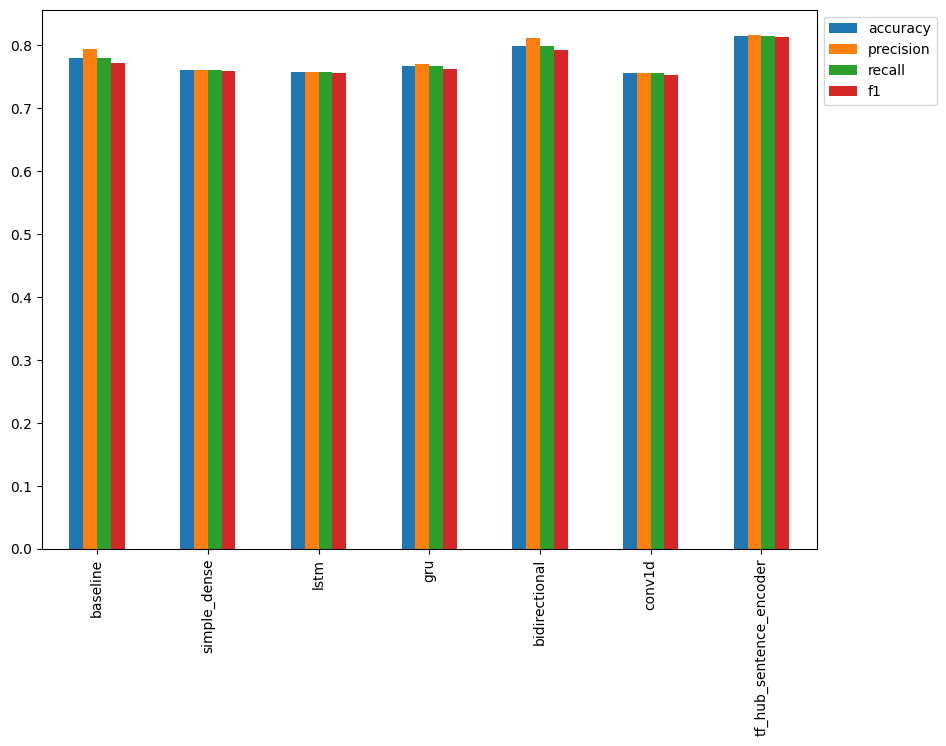

In [161]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));